In [112]:
import numpy as np
import pandas as pd

import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,precision_score,recall_score,accuracy_score,auc,roc_curve
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab

Portuguese banking institution

# Abstract: 


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

# goal

The classification goal is to predict if the client will subscribe a term deposit.

# Sources

The dataset is public available for research.

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [8]:
bank = pd.read_csv('bank.csv', sep = ',')

In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
bank.shape

(11162, 17)

In [11]:
#  Find missing values of each feature in the data set.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [12]:
bank.isnull().sum() # one way to search for null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Fortunately, there are no missing values. If there were missing values we will have to fill them with the median, mean or mode.

In [13]:
bank.describe().astype(np.int64)

,age,balance,day,duration,campaign,pdays,previous
count,11162,11162,11162,11162,11162,11162,11162
mean,41,1528,15,371,2,51,0
std,11,3225,8,347,2,108,2
min,18,-6847,1,2,1,-1,0
25%,32,122,8,138,1,-1,0
50%,39,550,15,255,2,-1,0
75%,49,1708,22,496,3,20,1
max,95,81204,31,3881,63,854,58


Age:

the medium age is 41 years old. the minimum age is 18 years old. the maximum age is 95 years old. 

Balance:

The std deviation looks high (3225) compared to the mean (1528).

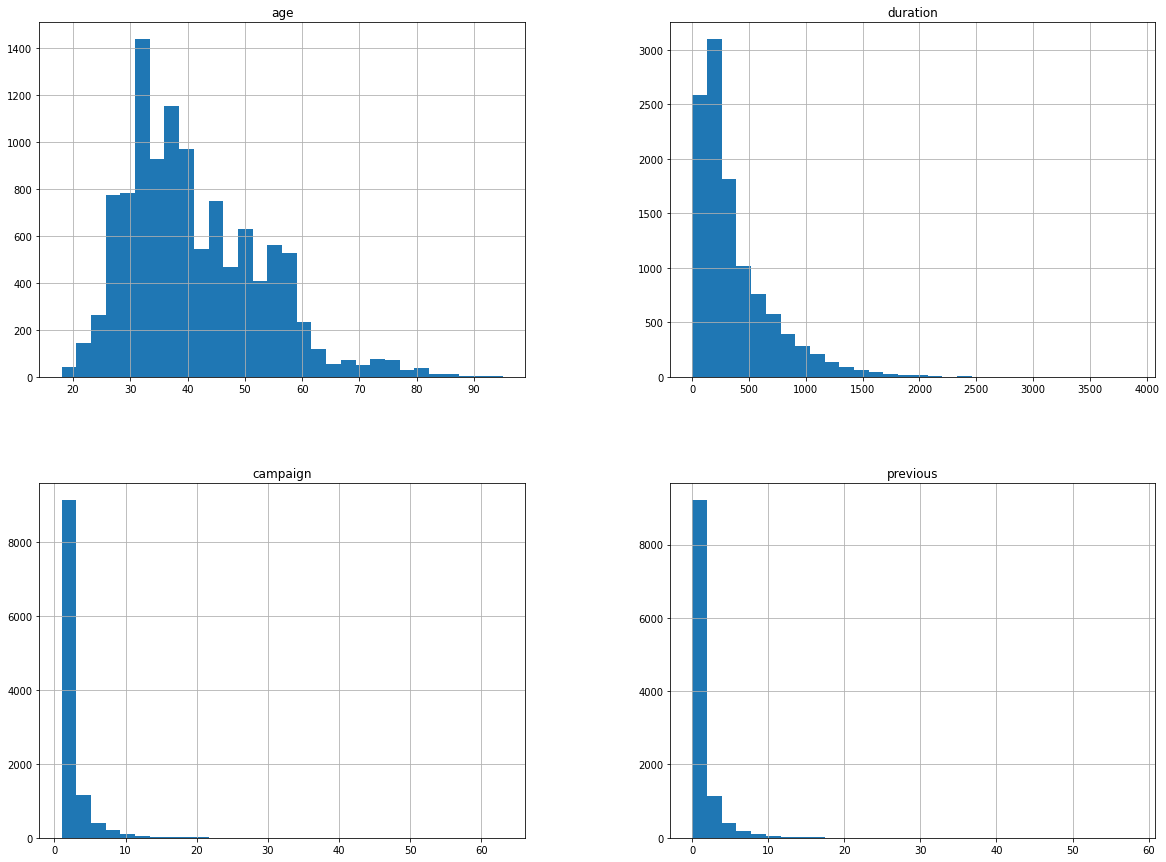

In [14]:
bank[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

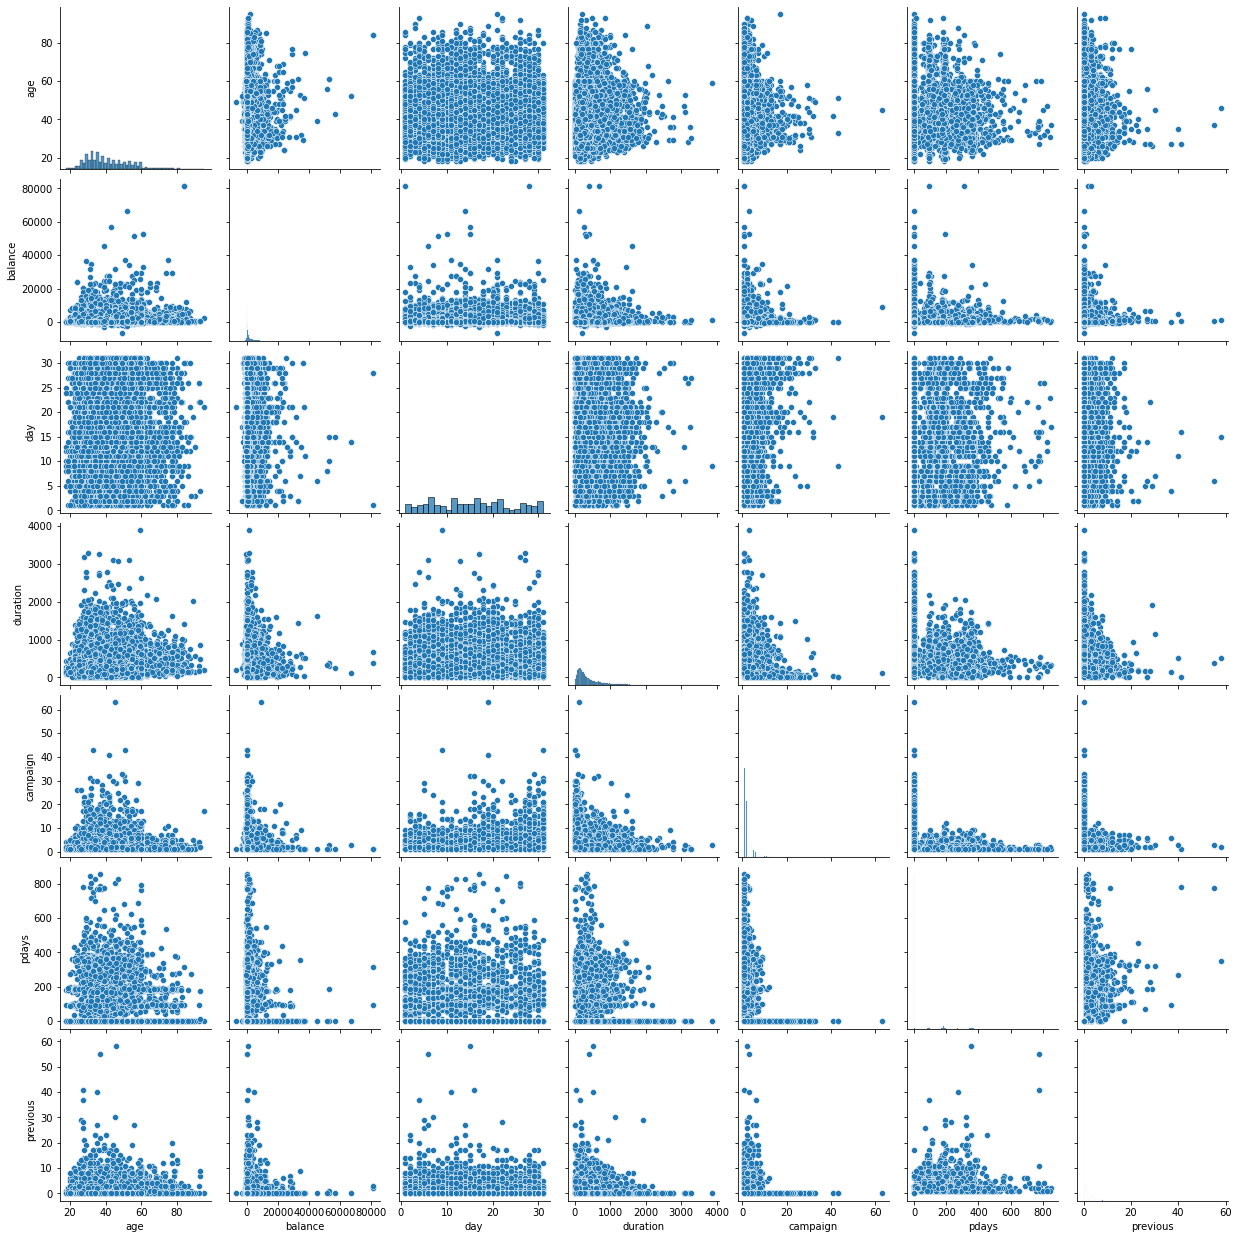

In [15]:
sns.pairplot(bank)

# The categorical variables

In [16]:
category_features = bank.select_dtypes(include=['object', 'bool']).columns.values

for col in category_features:
    print(col, "(", len(bank[col].unique()) , "values):\n", np.sort(bank[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
deposit ( 2 values):
 ['no' 'yes']


Checking out the categories and their respective counts in each feature

In [17]:
print("Job:",bank.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",bank.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",bank.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",bank.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank.month.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank.deposit.value_counts(),sep = '\n')
print("-"*40)

Job:
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
----------------------------------------
Marital:
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
----------------------------------------
Education:
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
----------------------------------------
Default:
no     10994
yes      168
Name: default, dtype: int64
----------------------------------------
Housing loan:
no     5881
yes    5281
Name: housing, dtype: int64
----------------------------------------
Personal loan:
no     9702
yes    1460
Name: loan, dtype: int64
----------------------------------------
Contact:
cellular     8042
unknown      2346
telephone     774
Name

As written in the dataset description, the duration column should be dropped since it includes an information which cannot be known before the call to the client.

In [18]:
bank=bank.drop('duration', axis=1)

# Data Cleaning and Feature Engineering

In [19]:
df_clean = bank.copy()

In [20]:
df_clean.describe().astype(np.int64)

,age,balance,day,campaign,pdays,previous
count,11162,11162,11162,11162,11162,11162
mean,41,1528,15,2,51,0
std,11,3225,8,2,108,2
min,18,-6847,1,1,-1,0
25%,32,122,8,1,-1,0
50%,39,550,15,2,-1,0
75%,49,1708,22,3,20,1
max,95,81204,31,63,854,58


transform day into a categorical feature.

In [21]:
df_clean['day'] = df_clean['day'].astype(object)

In [22]:
df_clean.describe()

,age,balance,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,2.508421,51.330407,0.832557
std,11.913369,3225.413326,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,63.000000,854.000000,58.000000


<AxesSubplot:>

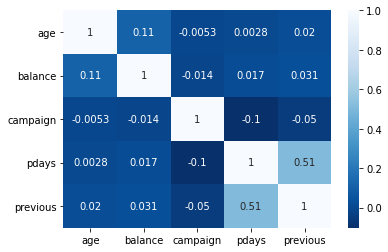

In [23]:
sns.heatmap(df_clean.corr() ,cmap='Blues_r', annot=True)

# Age analysis

<AxesSubplot:xlabel='age'>

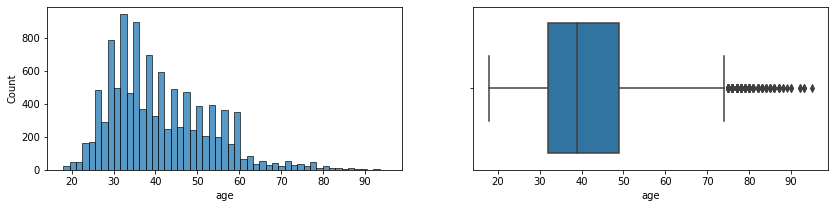

In [24]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='age', data=df_clean)
sns.boxplot(ax=ax[1], x='age', data=df_clean)

In order to remove outliers from this skewed distribution, we will define a function to get the upper and lower limits based on the IQR

In [25]:
def get_upper_lower(data):
    percentile25 = data.quantile(0.25)
    percentile75 = data.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    return upper_limit, lower_limit



In [26]:
upper_limit, lower_limit = get_upper_lower(df_clean['age'])
print('upper_limit: ', upper_limit)
print('lower_limit: ', lower_limit)

upper_limit:  74.5
lower_limit:  6.5


In [27]:
len(df_clean)

11162

In [28]:
df_clean = df_clean[(df_clean['age'] > lower_limit ) & (df_clean['age'] < upper_limit)]

<AxesSubplot:xlabel='age'>

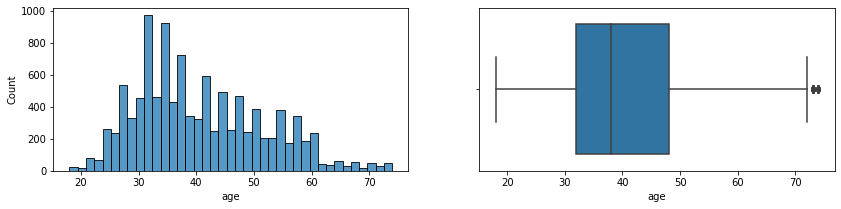

In [29]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='age', data=df_clean)
sns.boxplot(ax=ax[1], x='age', data=df_clean)

In [30]:
print('We removed {} outliers!'.format(len(bank)-len(df_clean)))

We removed 171 outliers!


# balance

<AxesSubplot:xlabel='balance'>

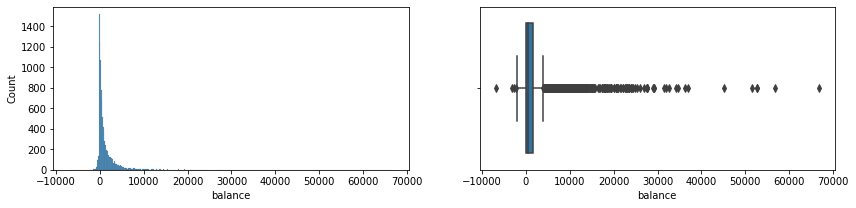

In [31]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='balance', data=df_clean)
sns.boxplot(ax=ax[1], x='balance', data=df_clean)

In [32]:
upper_limit, lower_limit = get_upper_lower(df_clean['balance'])
print('upper_limit: ', upper_limit)
print('lower_limit: ', lower_limit)

upper_limit:  4030.25
lower_limit:  -2227.75


<AxesSubplot:xlabel='balance'>

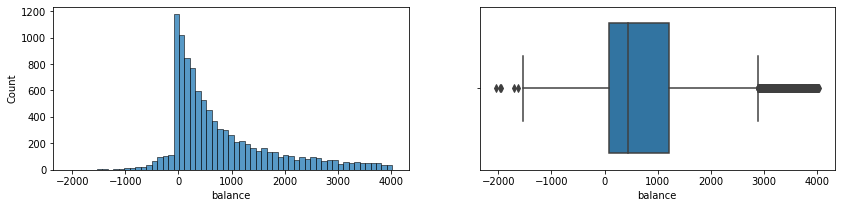

In [33]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='balance', data=df_clean[ (df_clean['balance'] > lower_limit ) & (df_clean['balance'] < upper_limit )])
sns.boxplot(ax=ax[1], x='balance', data=df_clean[ (df_clean['balance'] > lower_limit ) & (df_clean['balance'] < upper_limit )])

In [34]:
df_clean = df_clean[ (df_clean['balance'] > lower_limit) & (df_clean['balance'] < upper_limit)]

<AxesSubplot:xlabel='balance'>

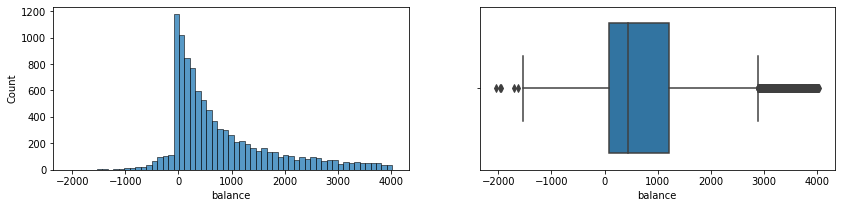

In [35]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='balance', data=df_clean)
sns.boxplot(ax=ax[1], x='balance', data=df_clean)

In [36]:
print('We removed {} outliers!'.format(len(bank)-len(df_clean)))

We removed 1208 outliers!


# campaign

<AxesSubplot:xlabel='campaign'>

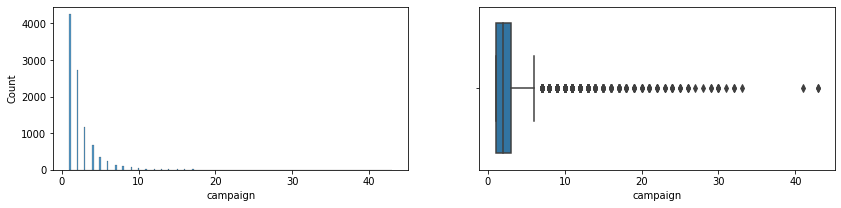

In [37]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='campaign', data=df_clean)
sns.boxplot(ax=ax[1], x='campaign', data=df_clean)

In [38]:
upper_limit, lower_limit = get_upper_lower(df_clean['campaign'])
print('upper_limit: ', upper_limit)
print('lower_limit: ', lower_limit)

upper_limit:  6.0
lower_limit:  -2.0


In [39]:
#df_clean = df_clean[ (df_clean['campaign'] > lower_limit ) & (df_clean['campaign'] < upper_limit )]

In [40]:
df_clean = df_clean[df_clean['campaign'] <= 40]

<AxesSubplot:xlabel='campaign'>

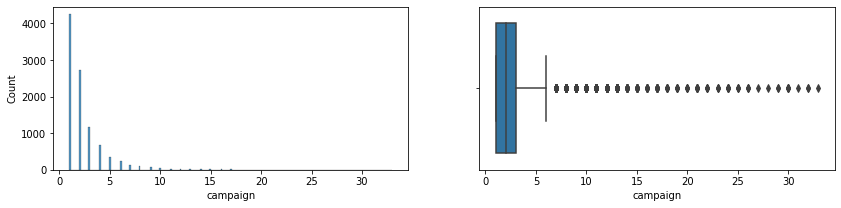

In [41]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='campaign', data=df_clean)
sns.boxplot(ax=ax[1], x='campaign', data=df_clean)

In [42]:
print('We removed {} outliers!'.format(len(bank)-len(df_clean)))

We removed 1211 outliers!


# pdays

<AxesSubplot:xlabel='pdays'>

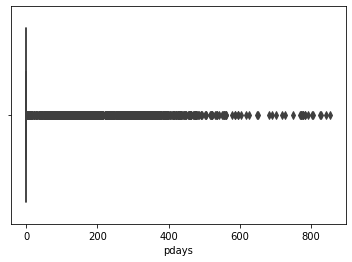

In [43]:
sns.boxplot(x='pdays', data=df_clean)

In [44]:
df_clean['pdays'].value_counts()

-1      7473
 92       85
 182      75
 91       72
 181      69
        ... 
 701       1
 717       1
 749       1
 805       1
 771       1
Name: pdays, Length: 457, dtype: int64

Encoding -1 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0

In [45]:
df_clean['prev_cont'] = df_clean['pdays'] ==-1
df_clean['prev_cont'] = df_clean['prev_cont'].replace([True,False],[1,0])

In [46]:
df_clean['pdays'] = df_clean['pdays'].replace(-1, 0)

In [47]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,prev_cont
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,0,unknown,yes,1


<AxesSubplot:xlabel='prev_cont', ylabel='count'>

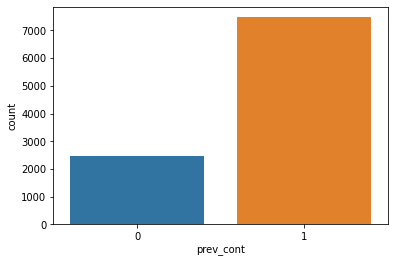

In [48]:
sns.countplot(x='prev_cont', data=df_clean)

converted -1 to 0 in pdays

# Exploratory Data Analysis

In [49]:
df=df_clean

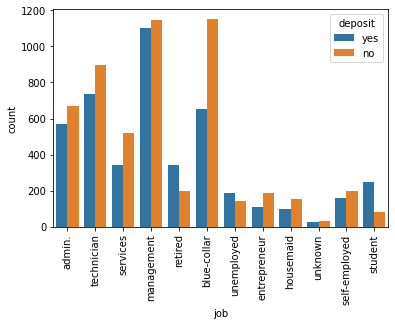

In [50]:
sns.countplot(x= 'job', hue = 'deposit', data=df )
plt.xticks(rotation=90);

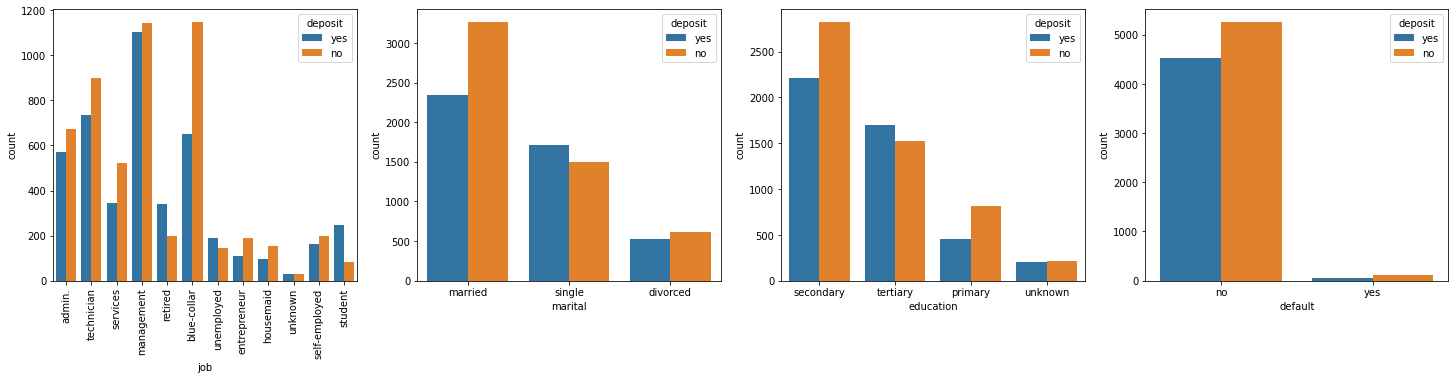

In [51]:
fig, axs =plt.subplots(1,4,figsize=(25, 5));
sns.countplot(x= 'job', hue = 'deposit', data=df, ax=axs[0]);
sns.countplot(x= 'marital', hue = 'deposit', data=df, ax=axs[1]);
sns.countplot(x= 'education', hue = 'deposit', data=df, ax=axs[2]);
sns.countplot(x= 'default', hue = 'deposit', data=df, ax=axs[3]);
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90);

We can say:

# Job:

The majority of retired clients or students accepted the deposit

The majority of blue collars refused the deposit

# Marital status:

Most of married clients refused the deposit

Single clients tended to accept the deposit

# Education:

Clients with a lower education (secondary and primary) tended to refuse the deposit

Clients with higher education ('tertiary') tended to accept the offer

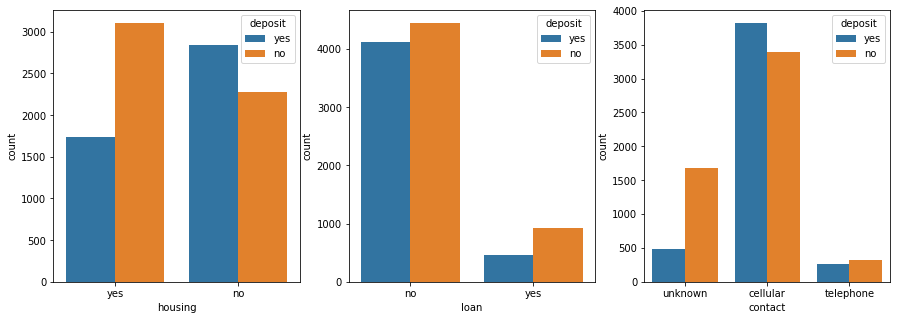

In [52]:
fig, axs =plt.subplots(1,3,figsize=(15, 5));
sns.countplot(x= 'housing', hue = 'deposit', data=df, ax=axs[0]);
sns.countplot(x= 'loan', hue = 'deposit', data=df, ax=axs[1]);
sns.countplot(x= 'contact', hue = 'deposit', data=df, ax=axs[2]);

# Housing (Loan) and (Personal) Loan:

Clients without a housing loan tended to accept the deposit compared to clients with a loan

(Personal) Loan:

Most of the clients which had a personal loan refused the deposit

Contact:

Clients with a cellular phone tended to accept the deposit.

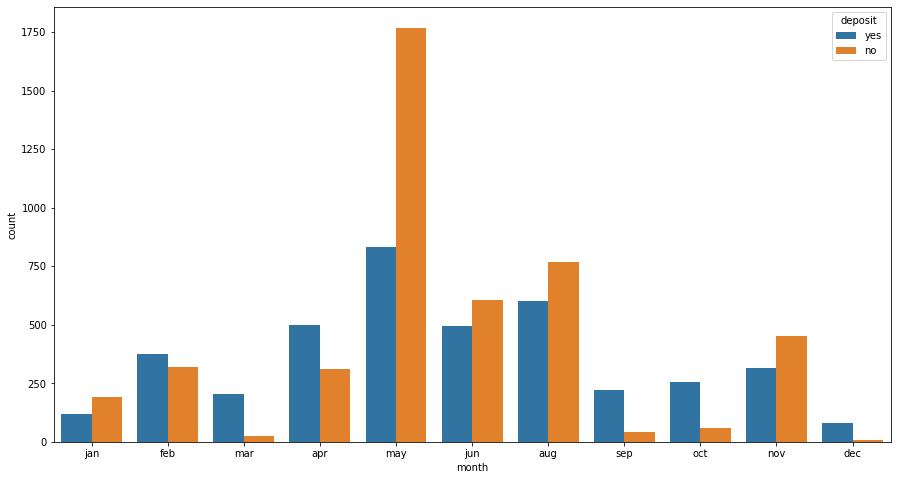

In [53]:
fig, axs =plt.subplots(1,1,figsize=(15, 8));
sns.countplot(x= 'month', hue = 'deposit', data=df, order=['jan','feb','mar','apr','may','jun','aug','sep','oct','nov','dec']);

# Month

The majority of data regards the month of 'may'.

In the months of February, March, April, September, October and December most of the clients accepted the deposit.

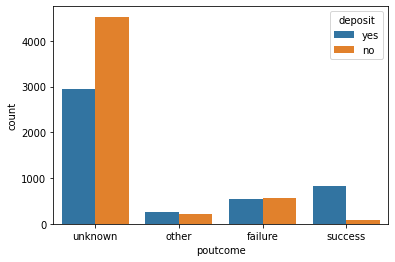

In [54]:
plt.figsize=(10, 10);
sns.countplot(x= 'poutcome', hue = 'deposit', data=df);

We can see that people who previously accepted the deposit tended to accept the new offers.

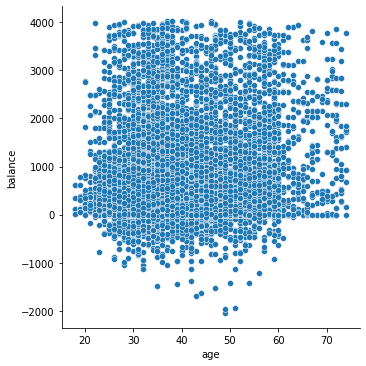

In [62]:
ax = sns.relplot(x='age', y='balance', data=df)

This plot looks messy, we will create a categorical column for 'age'.

In [67]:
df['age_cate'] = pd.cut(df['age'], 
                        bins=[18, 35, 55, 70, float('Inf')], 
                        labels=['18-35', '25-55', '55-70', '70-95'])

In [68]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,prev_cont,age_cate
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,0,unknown,yes,1,55-70
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,0,unknown,yes,1,55-70
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,0,unknown,yes,1,25-55
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,0,unknown,yes,1,25-55
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,0,unknown,yes,1,25-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,0,0,unknown,no,1,18-35
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,0,0,unknown,no,1,25-55
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,0,0,unknown,no,1,18-35
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no,0,25-55


Text(0.5, 1.0, 'Balance VS Age by Deposit')

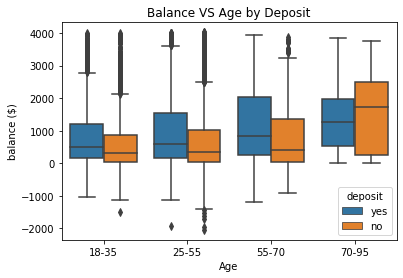

In [69]:
sns.boxplot(x='age_cate', y='balance', hue='deposit', data=df)
plt.ylabel('balance ($)')
plt.xlabel('Age')
plt.title('Balance VS Age by Deposit')

we can see that older customers tends to have a higher bank balance and that customers who accepted the deposit tended to have a higher balance compared to the customers who refused the deposit

Text(0.5, 1.0, 'Balance VS Marital Status by Deposit')

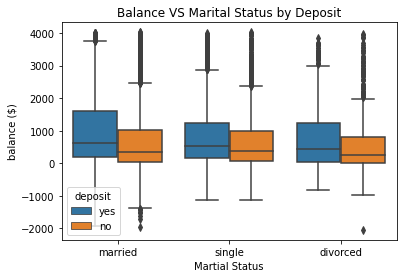

In [71]:
sns.boxplot(x='marital', y='balance', hue='deposit', data=df)
plt.ylabel('balance ($)')
plt.xlabel('Martial Status')
plt.title('Balance VS Marital Status by Deposit')

In [72]:
df=df.drop('age_cate', axis=1)

# Data Preparation

In [73]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,prev_cont
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,0,unknown,yes,1


In [74]:
df = df.replace(['yes','no'], [1,0])

In [75]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,prev_cont
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1,0,0,unknown,1,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1,0,0,unknown,1,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1,0,0,unknown,1,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,1,0,0,unknown,1,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,2,0,0,unknown,1,1


<AxesSubplot:>

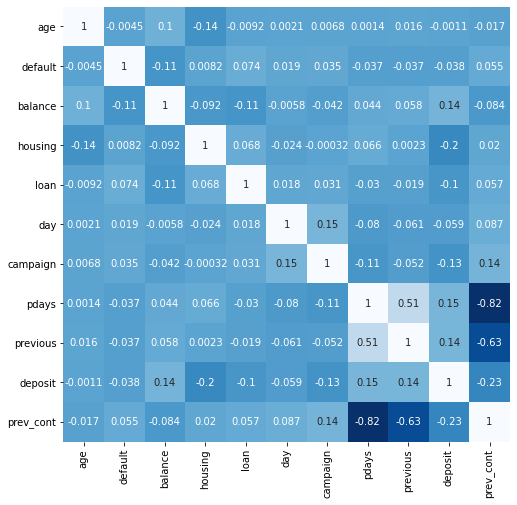

In [76]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True, cbar=False)

In [77]:
df.deposit.value_counts()

0    5377
1    4574
Name: deposit, dtype: int64

encode categorical features

In [78]:
cat_feat = df.select_dtypes(include="object").columns

In [79]:
cat_feat

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

These categorical featurs will be encoded by one hot encoding.

In [80]:
encoded_df = pd.get_dummies(df, drop_first=True)

In [81]:
encoded_df

,age,default,balance,housing,loan,day,campaign,pdays,previous,deposit,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,2,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,0,0,16,4,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,0,29,0,0,19,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,0,0,1,8,2,172,5,0,...,0,0,0,1,0,0,0,0,0,0


In [99]:
X = encoded_df.drop('deposit', axis=1)
y = encoded_df['deposit']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [101]:
scaler = StandardScaler()

In [102]:
scaler.fit(X_train)

StandardScaler()

In [103]:
X_train = scaler.transform(X_train)          
X_test = scaler.transform(X_test) 

# KNN

In [104]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [105]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [106]:
y_pred_knn = knn_model.predict(X_test)

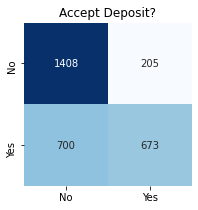

In [108]:
fig, ax =plt.subplots(figsize=(3,3))
labels=['No','Yes']
ax=sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Blues", fmt='g', cbar=False)
plt.title('Accept Deposit?')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [113]:
print('Accuracy ',np.round(accuracy_score(y_test, y_pred_knn),2))
print('Precision ',np.round(precision_score(y_test, y_pred_knn),2))
print('Recall ',np.round(recall_score(y_test, y_pred_knn),2))
print('F1 ',np.round(f1_score(y_test, y_pred_knn),2))
print('ROC AUC ',np.round(roc_auc_score(y_test, y_pred_knn),2))
   

Accuracy  0.7
Precision  0.77
Recall  0.49
F1  0.6
ROC AUC  0.68


# Random forest

In [114]:
rfc_model = RandomForestClassifier(n_estimators=1000, max_depth=100, max_features=20)

In [115]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_features=20, n_estimators=1000)

In [116]:
y_pred_rfc = rfc_model.predict(X_test)

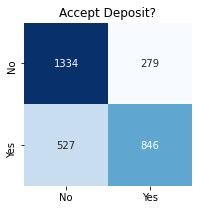

In [117]:
fig, ax =plt.subplots(figsize=(3,3))
labels=['No','Yes']
ax=sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, cmap="Blues", fmt='g', cbar=False)
plt.title('Accept Deposit?')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [118]:
print('Accuracy ',np.round(accuracy_score(y_test, y_pred_rfc),2))
print('Precision ',np.round(precision_score(y_test, y_pred_rfc),2))
print('Recall ',np.round(recall_score(y_test, y_pred_rfc),2))
print('F1 ',np.round(f1_score(y_test, y_pred_rfc),2))
print('ROC AUC ',np.round(roc_auc_score(y_test, y_pred_rfc),2))
   

Accuracy  0.73
Precision  0.75
Recall  0.62
F1  0.68
ROC AUC  0.72
